# **Classification of Cifar10 images with convolutional networks**

## Importing the libraries and data

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <div style="font-family:B Lotus, B Nazanin, Tahoma">Cifar10 dataset </div>
<div style="font-family:Tahoma">
<br>
This data set contains 32 x 32 color images in 10 different classes, including cars, trucks, horses, etc., which are available in the keras framework and we use the same.
<br>
You can read more information about this dataset from the site of this dataset:
<br>
</div>

https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


## <div style="font-family:B Lotus, B Nazanin, Tahoma">Let's take a look at the dataset...</div>
<div style="font-family:Tahoma">
Below we see the image that is in the 7th index of this data set.</div>


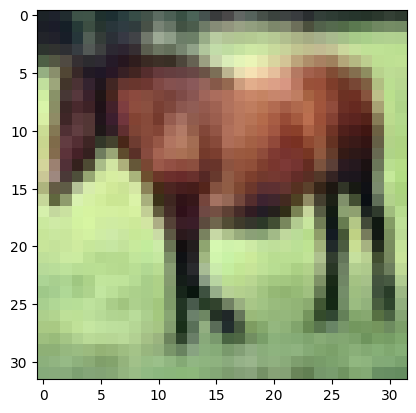

In [3]:
n_array=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plt.imshow(x_train[7])

<div style="font-family:Tahoma">We convert the image matrices into float32 data type and normalize the pixel values ​​and bring them between 0 and 1.
<br>

In [4]:
x_train = x_train.astype('float32')/ 255
x_test = x_test.astype('float32')/ 255


<div style="font-family:Tahoma">
As you can see, the labels are numerical and now we convert them to one-hot format.<br>
</div>


<div style="font-family:Tahoma">
Some labels before converting to one-hot format:</div>

In [5]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

<div style="font-family:Tahoma">
Some labels after converting to one-hot format:</div>

In [7]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)


<div style="font-family:Tahoma">
Now, make a convolutional network:</div>

In [8]:
# Define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

<div style="font-family:Tahoma">compile the model and send the opt_rms variable to the function as an optimizer.
</div>

In [9]:
opt_rms = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001,decay=1e-6)
# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer= opt_rms,
              metrics=['accuracy'])

<div style="font-family:Tahoma">
I train it by calling the fit method on the model.
    <br>
As validation data, I will also send x_test and y_test to be announced in each series of performance on the test data.
</div>

In [10]:
history = model.fit(x_train, y_train,
          epochs=25, batch_size=64, validation_data = (x_test, y_test))

Epoch 1/25
782/782 [==============================] - 14s 6ms/step - loss: 1.8650 - accuracy: 0.3081 - val_loss: 1.5468 - val_accuracy: 0.4427
Epoch 2/25
782/782 [==============================] - 4s 6ms/step - loss: 1.5445 - accuracy: 0.4401 - val_loss: 1.3970 - val_accuracy: 0.5049
Epoch 3/25
782/782 [==============================] - 4s 5ms/step - loss: 1.4111 - accuracy: 0.4930 - val_loss: 1.3044 - val_accuracy: 0.5274
Epoch 4/25
782/782 [==============================] - 4s 5ms/step - loss: 1.3282 - accuracy: 0.5260 - val_loss: 1.2599 - val_accuracy: 0.5569
Epoch 5/25
782/782 [==============================] - 4s 5ms/step - loss: 1.2626 - accuracy: 0.5509 - val_loss: 1.1803 - val_accuracy: 0.5861
Epoch 6/25
782/782 [==============================] - 4s 4ms/step - loss: 1.2178 - accuracy: 0.5683 - val_loss: 1.1034 - val_accuracy: 0.6152
Epoch 7/25
782/782 [==============================] - 4s 5ms/step - loss: 1.1787 - accuracy: 0.5844 - val_loss: 1.1484 - val_accuracy: 0.5926
Epoch

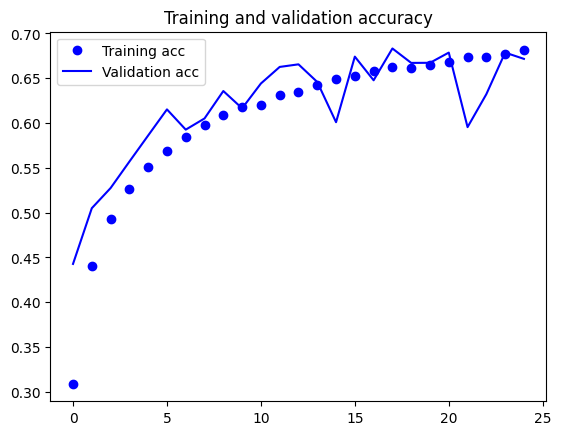

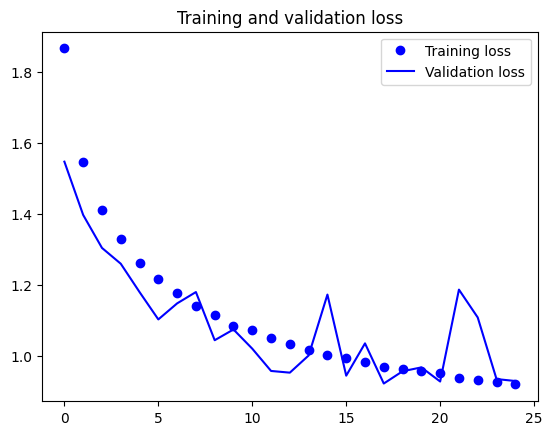

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<div style="font-family:Tahoma">
I change the network and hyperparameters of this network to maximize the accuracy of the test data.
</div>


In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 global_average_pooling2d (G  (None, 64)               0

In [10]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# Fit model on training data
history = model.fit(x_train, y_train,
          epochs=200, batch_size=256, validation_data = (x_test, y_test))

Epoch 1/200
196/196 [==============================] - 15s 12ms/step - loss: 2.1032 - accuracy: 0.1884 - val_loss: 1.8594 - val_accuracy: 0.2963
Epoch 2/200
196/196 [==============================] - 2s 8ms/step - loss: 1.8658 - accuracy: 0.2752 - val_loss: 1.6980 - val_accuracy: 0.3482
Epoch 3/200
196/196 [==============================] - 2s 10ms/step - loss: 1.7541 - accuracy: 0.3207 - val_loss: 1.5925 - val_accuracy: 0.4007
Epoch 4/200
196/196 [==============================] - 2s 9ms/step - loss: 1.6855 - accuracy: 0.3559 - val_loss: 1.5409 - val_accuracy: 0.4286
Epoch 5/200
196/196 [==============================] - 2s 10ms/step - loss: 1.6432 - accuracy: 0.3719 - val_loss: 1.5240 - val_accuracy: 0.4252
Epoch 6/200
196/196 [==============================] - 2s 9ms/step - loss: 1.6113 - accuracy: 0.3881 - val_loss: 1.5031 - val_accuracy: 0.4243
Epoch 7/200
196/196 [==============================] - 2s 8ms/step - loss: 1.5770 - accuracy: 0.4055 - val_loss: 1.4333 - val_accuracy: 0.

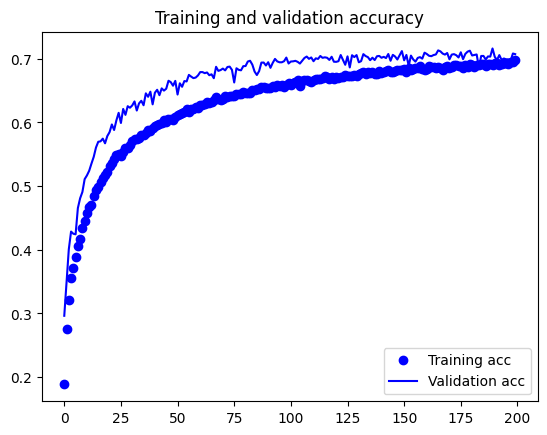

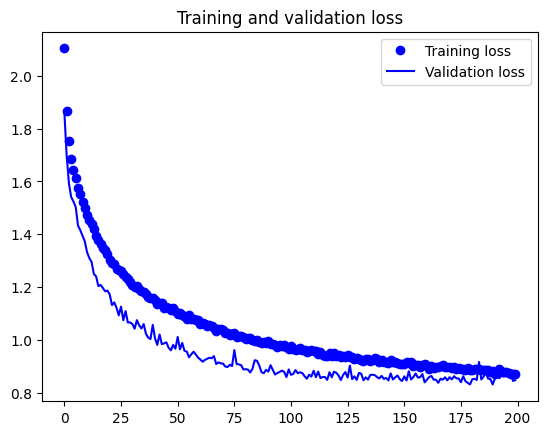

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
# Test on unseen data
results = model.evaluate(x_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.8483 - accuracy: 0.7074
Final test set loss: 0.848305
Final test set accuracy: 0.707400
